## ARMA

In [7]:
%matplotlib inline
import numpy as np
from scipy import stats
import pandas
import matplotlib.pyplot as plt

import tushare as ts
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [24]:
df_ldkg = ts.get_hist_data('600606',start='2014-12-23',end='2016-12-23')
df_ldkg['close'][0:5]

date
2016-12-23    8.87
2016-12-22    9.01
2016-12-21    9.06
2016-12-20    9.02
2016-12-19    9.02
Name: close, dtype: float64

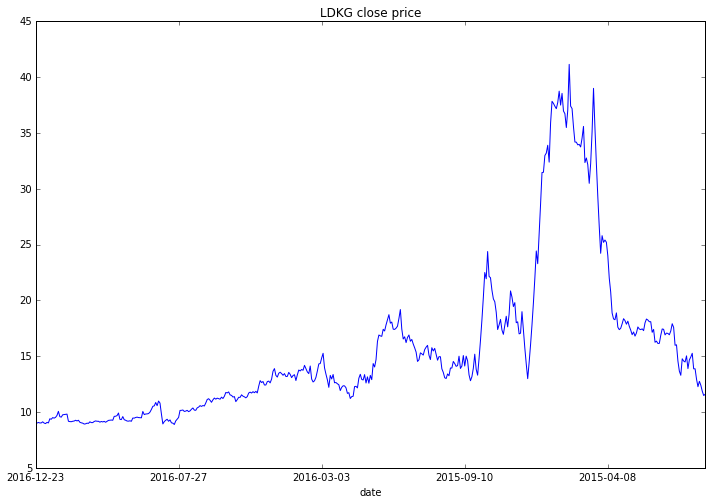

In [25]:
df_ldkg['close'].plot(figsize=(12,8)); 
plt.title('LDKG close price') #price chart

In [78]:
dr= df_ldkg['close'][:-1].values / df_ldkg['close'][1:] - 1 #daily return
dr.index

Index([u'2016-12-22', u'2016-12-21', u'2016-12-20', u'2016-12-19',
       u'2016-12-16', u'2016-12-15', u'2016-12-14', u'2016-12-13',
       u'2016-12-12', u'2016-12-09', 
       ...
       u'2015-01-07', u'2015-01-06', u'2015-01-05', u'2014-12-31',
       u'2014-12-30', u'2014-12-29', u'2014-12-26', u'2014-12-25',
       u'2014-12-24', u'2014-12-23'],
      dtype='object', name=u'date', length=468)

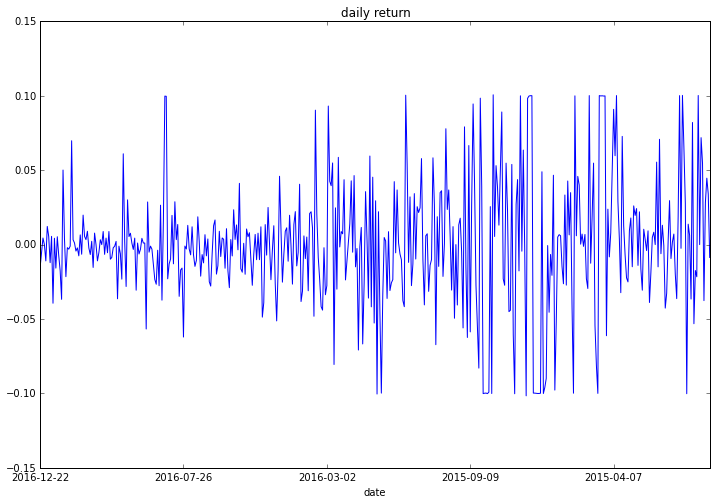

In [27]:
dr.plot(figsize=(12,8))
plt.title('daily return') # return chart

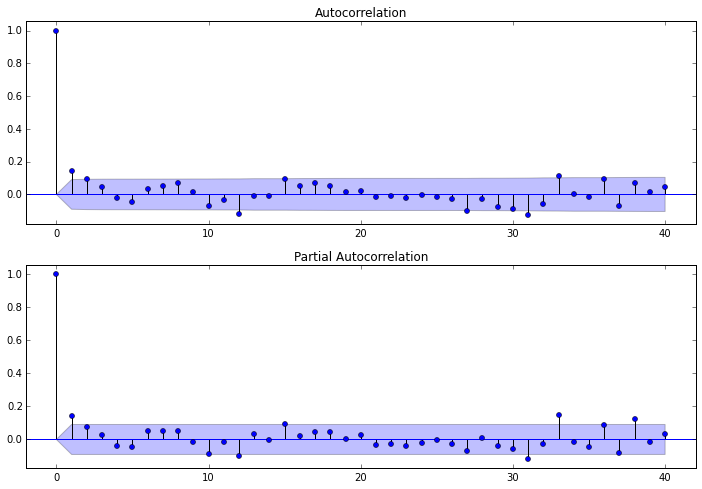

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dr.values.squeeze(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dr, lags=40, ax=ax2)

## ARMA MODEL

In [79]:
from datetime import datetime

In [80]:
date = [datetime.strptime(i, '%Y-%m-%d') for i in list(dr.index.values)]
dr.index = pandas.Index(date)

In [81]:
dr.index

DatetimeIndex(['2016-12-22', '2016-12-21', '2016-12-20', '2016-12-19',
               '2016-12-16', '2016-12-15', '2016-12-14', '2016-12-13',
               '2016-12-12', '2016-12-09', 
               ...
               '2015-01-07', '2015-01-06', '2015-01-05', '2014-12-31',
               '2014-12-30', '2014-12-29', '2014-12-26', '2014-12-25',
               '2014-12-24', '2014-12-23'],
              dtype='datetime64[ns]', length=468, freq=None, tz=None)

In [82]:
arma_mod20 = sm.tsa.ARMA(dr, (2,0)).fit()
print arma_mod20.params

const          0.000313
ar.L1.close    0.130889
ar.L2.close    0.073689
dtype: float64


In [83]:
print arma_mod20.aic

-1638.66944226


## Test

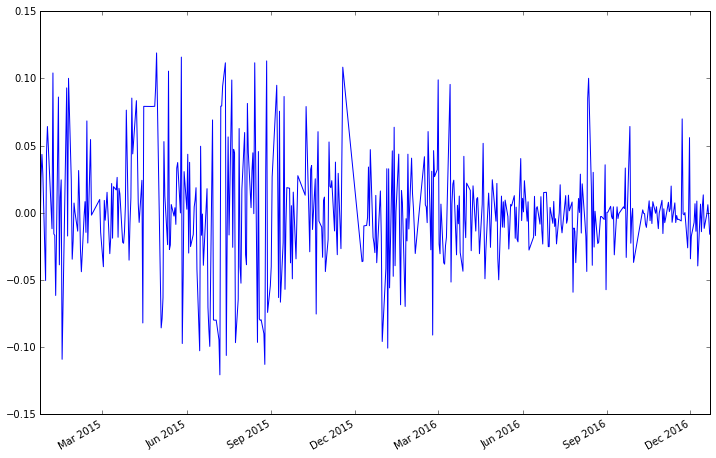

In [84]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);

In [85]:
sm.stats.durbin_watson(arma_mod20.resid.values)

2.002427895310035

In [87]:
resid = arma_mod20.resid
stats.normaltest(resid)

NormaltestResult(statistic=10.131589033012421, pvalue=0.0063088963886942873)

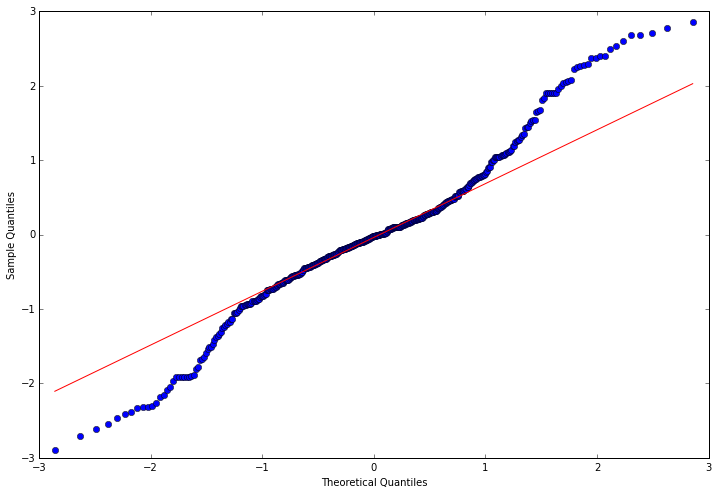

In [88]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

## prediction

In [105]:
predict_sunspots = arma_mod20.predict('2016-12-07',dynamic=True)
print predict_sunspots

2016-12-07   -0.002095
2016-12-06    0.000290
2016-12-05    0.000133
2016-12-02    0.000288
2016-12-01    0.000297
2016-11-30    0.000309
2016-11-29    0.000311
2016-11-28    0.000313
2016-11-25    0.000313
2016-11-24    0.000313
2016-11-23    0.000313
2016-11-22    0.000313
2016-11-21    0.000313
2016-11-18    0.000313
2016-11-17    0.000313
2016-11-16    0.000313
2016-11-15    0.000313
2016-11-14    0.000313
2016-11-11    0.000313
2016-11-10    0.000313
2016-11-09    0.000313
2016-11-08    0.000313
2016-11-07    0.000313
2016-11-04    0.000313
2016-11-03    0.000313
2016-11-02    0.000313
2016-11-01    0.000313
2016-10-31    0.000313
2016-10-28    0.000313
2016-10-27    0.000313
                ...   
2015-02-04    0.000313
2015-02-03    0.000313
2015-02-02    0.000313
2015-01-30    0.000313
2015-01-29    0.000313
2015-01-28    0.000313
2015-01-27    0.000313
2015-01-26    0.000313
2015-01-23    0.000313
2015-01-22    0.000313
2015-01-21    0.000313
2015-01-20    0.000313
2015-01-19 

In [93]:
dr.index

DatetimeIndex(['2016-12-22', '2016-12-21', '2016-12-20', '2016-12-19',
               '2016-12-16', '2016-12-15', '2016-12-14', '2016-12-13',
               '2016-12-12', '2016-12-09', 
               ...
               '2015-01-07', '2015-01-06', '2015-01-05', '2014-12-31',
               '2014-12-30', '2014-12-29', '2014-12-26', '2014-12-25',
               '2014-12-24', '2014-12-23'],
              dtype='datetime64[ns]', length=468, freq=None, tz=None)